In [220]:
# インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp
import statsmodels.api as sm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

### 小さなデータセットの用意

以前も利用した回帰のデータセットを用意します。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。


train.csvを学習用（train）8割、検証用（val）2割に分割してください。


scikit-learn
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


[sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)


[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [29]:
data = pd.read_csv("train.csv")
df = pd.DataFrame(data=data, columns=['GrLivArea', 'YearBuilt','SalePrice'])
display(df)

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
test_X = df.iloc[:,0].values

X_train, X_val, y_train, y_val = train_test_split( X, y, train_size=0.8, random_state=50)
#print(X_train, X_val, y_train, y_val)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[[1232 2007]
 [ 520 1927]
 [1052 1968]
 ...
 [1327 1959]
 [2599 1999]
 [1844 1977]] [[1466 2007]
 [1509 1988]
 [1302 1972]
 [1154 1922]
 [2000 2004]
 [1682 1998]
 [1437 1956]
 [1395 1972]
 [1165 1966]
 [1876 1974]
 [1348 1925]
 [1416 1999]
 [ 438 1920]
 [1471 1999]
 [1768 2005]
 [1616 2005]
 [1776 1958]
 [1790 1972]
 [1828 2007]
 [1080 1983]
 [1524 1979]
 [3608 1892]
 [1131 1937]
 [2201 1966]
 [1691 1924]
 [1306 2005]
 [1915 1992]
 [1005 1955]
 [2113 1995]
 [1800 2007]
 [1121 1963]
 [ 894 1976]
 [1656 2003]
 [ 955 1966]
 [1387 1954]
 [1144 1961]
 [1800 2000]
 [1728 2003]
 [ 764 1925]
 [ 925 1965]
 [1346 1910]
 [1456 2005]
 [1126 1977]
 [2080 1926]
 [1236 1957]
 [2121 2006]
 [1646 1941]
 [1630 2000]
 [2126 1967]
 [1665 2007]
 [1933 2007]
 [1911 1993]
 [1701 1975]
 [ 848 2003]
 [2450 1998]
 [1708 2004]
 [1271 1948]
 [ 894 1962]
 [2728 2005]
 [3228 1992]
 [1060 1976]
 [1456 1976]
 [1651 1986]
 [1302 1971]
 [2161 2007]
 [1484 1971]
 [ 930 1946]
 [1573 2000]
 [ 900 1967]
 [1040 1965]
 [1456

In [109]:
# 標準化する

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# 【問題1】ブレンディングのスクラッチ実装
ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。


ブレンディングとは

ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。


* 手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
* ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
* 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。


回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。


《補足》


分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。


[sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

### 【解答①】
使用モデル
* Linear Regression
* Random Forest
* KNN

ハイパーパラメータは全てデフォルト

評価基準はRMSE

In [142]:
seed = None
result = pd.DataFrame(data=[y_val],index=["val"]).T

model_dict = {
    'linear regression' : LinearRegression(),
    'RandomForest' : RandomForestRegressor(),
    'knn' : KNeighborsRegressor(),
    #'TREE' : DecisionTreeRegressor(),
    #'SVM' : SVR(kernel='rbf', C=10, epsilon=0.1, gamma='auto'),    
}


tmp_dict = {}
mse_dict = {}

for name, model in model_dict.items():
    clf = model
    clf.fit(X_train, y_train)
    pred= clf.predict(X_val)
    tmp_dict[name] = pred
    mse_dict[name] = np.sqrt(mean_squared_error(y_val, pred))
    print(f'{name} : {np.sqrt(mean_squared_error(y_val, pred)):.5f}')
                             

from_dict = pd.DataFrame(tmp_dict)
result = pd.concat([result, from_dict], axis=1)

mean = from_dict.mean(axis=1)
print("mean : {:.5f}".format(np.sqrt(mean_squared_error(y_val, mean))))
#mse_dict["mean"] = np.sqrt(mean_squared_error(y_val, mean))
#print(mse_dict)


result = pd.concat([result, from_dict.mean(axis=1)], axis=1)
result = result.rename(columns={0:'mean'})
display(result)



linear regression : 45125.56207
RandomForest : 42230.99063
knn : 44432.94492
mean : 41306.61159


,val,linear regression,RandomForest,knn,mean
0,201000,213910.492188,256423.453333,213161.4,227831.781840
1,175000,197934.406328,198737.000000,186820.0,194497.135443
2,119500,162090.864783,139904.590000,130000.0,143998.484928
3,125500,96006.300733,131938.000000,119000.0,115648.100244
4,305900,259923.028165,268381.900000,260258.0,262854.309388
...,...,...,...,...,...
287,210000,226375.143041,267890.140000,221180.0,238481.761014
288,372500,268354.567735,298277.800000,248158.6,271596.989245
289,315000,251308.836510,252070.240000,315652.2,273010.425503
290,260400,225752.642352,221916.500000,215100.0,220923.047451


各モデルの平均をとったmeanが一番小さくなった。

### 【解答②】
使用モデルを変更
* LinerRegression
* 決定木
* KNN
* SGDRegressor

ハイパーパラメータはSGDRのみ学習率を変更

In [169]:
seed = None
result = pd.DataFrame(data=[y_val],index=["val"]).T

model_dict = {
    'linear regression' : LinearRegression(normalize=True),
    'TREE' : DecisionTreeRegressor(),
    #'RandomForest' : RandomForestRegressor(n_estimators=50, random_state=seed),
    'knn' : KNeighborsRegressor(),
    'SGDRegressor' : SGDRegressor(eta0=1e-9),    
}


tmp_dict = {}

for name, model in model_dict.items():
    clf = model
    clf.fit(X_train, y_train)
    pred= clf.predict(X_val)
    tmp_dict[name] = pred
    print(f'{name} : {np.sqrt(mean_squared_error(y_val, pred)):.5f}')
                             

from_dict = pd.DataFrame(tmp_dict)
result = pd.concat([result, from_dict], axis=1)

mean = from_dict.mean(axis=1)
name = "mean"
print(f'{name} : {np.sqrt(mean_squared_error(y_val, mean)):.5f}')

result = pd.concat([result, from_dict.mean(axis=1)], axis=1)
result = result.rename(columns={0:'mean'})
display(result)


linear regression : 45125.56207
TREE : 54325.00893
knn : 44432.94492
SGDRegressor : 54186.88642
mean : 44007.54153


,val,linear regression,TREE,knn,SGDRegressor,mean
0,201000,213910.492188,282922.0,213161.4,177243.604333,221809.374130
1,175000,197934.406328,212000.0,186820.0,181193.711938,194487.029566
2,119500,162090.864783,106000.0,130000.0,160454.740971,139636.401439
3,125500,96006.300733,137500.0,119000.0,145008.513957,124378.703672
4,305900,259923.028165,250000.0,260258.0,230034.127675,250053.788960
...,...,...,...,...,...,...
287,210000,226375.143041,287090.0,221180.0,189529.285476,231043.607129
288,372500,268354.567735,253293.0,248158.6,234649.915109,251114.020711
289,315000,251308.836510,250000.0,315652.2,300815.258867,279444.073844
290,260400,225752.642352,191000.0,215100.0,202200.187959,208513.207578


meanが最小になったのでOK。

### 【解答③】
使用モデルを変更
* LinerRegression
* 決定木
* ランダムフォレスト
* KNN
* SVM
* SGDRegressor
* ハイパーパラメータはSGDRの学習率とSVMの正則化率Cを変更
* データを標準化

linear regression : 0.21797
TREE : 0.28759
RandomForest : 0.22015
KNN : 0.22295
SVM : 0.21708
SGDRegressor : 0.21814
mean : 0.21196


,val,linear regression,TREE,RandomForest,KNN,SVM,SGDRegressor,mean
0,201000.0,203380.540080,282922.0,238630.573033,234912.438458,217690.648032,203687.175622,228683.735940
1,175000.0,184532.382960,212000.0,196505.379059,180323.829105,176809.080286,184571.524006,188763.293567
2,119500.0,152777.963162,175500.0,127238.817307,131731.095125,156739.810319,152734.825596,148580.058649
3,125500.0,105448.381357,137500.0,135784.172194,115229.190311,104322.548415,105127.322429,116405.815477
4,305900.0,252532.776076,233000.0,264641.474901,284969.984701,272002.124911,252535.573882,259420.481114
...,...,...,...,...,...,...,...,...
287,210000.0,216094.586385,287090.0,266743.541765,236822.571564,246629.659951,216368.223222,243633.099421
288,372500.0,264072.202914,253293.0,287176.962825,347290.496068,315522.761826,264111.494624,286748.438596
289,315000.0,223859.364138,189000.0,253017.680424,197485.125000,228689.821668,222458.911697,218073.634727
290,260400.0,212621.399647,324000.0,220416.372030,193465.986232,203230.044394,212663.092444,224188.543359


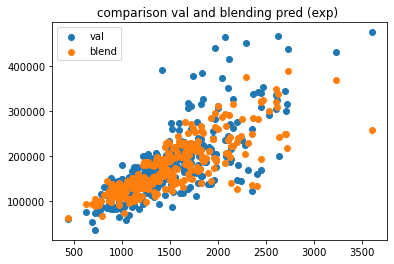

In [402]:
# 標準化した値で検証した版
seed = None
result = pd.DataFrame(data=[y_val_log],index=["val"]).T

model_dict = {
     'linear regression' : LinearRegression(normalize=True),
    'TREE' : DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor(n_estimators=50, random_state=seed),
    'KNN' : KNeighborsRegressor(),
    'SVM' : SVR(kernel='rbf', C=5, epsilon=0.1, gamma='auto'),
    'SGDRegressor' : SGDRegressor(eta0=1e-2), 
}


tmp_dict = {}

for name, model in model_dict.items():
    clf = model
    clf.fit(X_train_std, y_train_log)
    pred= clf.predict(X_val_std)
    tmp_dict[name] = pred
    print(f'{name} : {np.sqrt(mean_squared_error(y_val_log, pred)):.5f}')
                             

from_dict = pd.DataFrame(tmp_dict)
result = pd.concat([result, from_dict], axis=1)

mean = from_dict.mean(axis=1)
name = "mean"
print(f'{name} : {np.sqrt(mean_squared_error(y_val_log, mean)):.5f}')

result = pd.concat([result, from_dict.mean(axis=1)], axis=1)
result = result.rename(columns={0:'mean'})
#display(result)

result_exp = np.exp(result)
display(result_exp)

plt.title("comparison val and blending pred (exp) ")
plt.scatter(X_val[:,0], y_val, label="val")
plt.scatter(X_val[:,0], result_exp["mean"], label="blend")
#plt.plot(tmp_dict["SVM"])
plt.legend()
plt.show()

こちらでもmeanが僅かながら最小になった。

# 【問題2】バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。


バギングとは

バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（ ブートストラップサンプル ）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。


推定結果の平均をとる部分はブースティングと同様の実装になります。



### 【解答】一つの決定木とブートストラップサンプル10個の平均をとった場合を比較

In [393]:
# ただの決定木
single_tree = DecisionTreeRegressor()
single_tree.fit(X_train,y_train)
st_pred = single_tree.predict(X_val)
#print(st_pred)

single = pd.DataFrame(data=[y_val, st_pred], index=["val", "single_tree"]).T
display(single)

sin_rmse = np.sqrt(mean_squared_error(y_val, st_pred))
print("single_tree : {}".format(sin_rmse))


,val,single_tree
0,201000.0,282922.0
1,175000.0,212000.0
2,119500.0,106000.0
3,125500.0,137500.0
4,305900.0,250000.0
...,...,...
287,210000.0,287090.0
288,372500.0,253293.0
289,315000.0,250000.0
290,260400.0,185000.0


single_tree : 55812.57329025222


In [476]:
# バギング、10回試行
log_dict = {}
bagging_tree = DecisionTreeRegressor()


# train_test_splitでブートストラップサンプルを作成し、それぞれを使って学習、推測、辞書に格納まで
for i in range(10):
    X_train_train, _, y_train_train, _ = train_test_split( X_train, y_train, train_size=0.8,shuffle=True)
    #X_train_train, X_train_val, y_train_train, y_train_val = train_test_split( X, y, train_size=0.8, random_state=None)
    bagging_tree.fit(X_train_train,y_train_train)
    pred = bagging_tree.predict(X_val)
    log_dict["iter" + "{}".format(i)] = pred

# DataFrame化
log_df = pd.DataFrame(log_dict)

# 平均を取得
bagging_mean = log_df.mean(axis=1)

# 正解ラベル列や平均列をDataFrameに追加
log_df["val"] = y_val
log_df['bagging_mean'] = bagging_mean
display(log_df)

# 平均二乗平方誤差
ba_rmse = np.sqrt(mean_squared_error(y_val, bagging_mean))
print("bagging_tree : {}".format(ba_rmse))

,iter0,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,val,bagging_mean
0,282922.0,172785.0,282922.0,282922.0,282922.0,282922.0,244600.0,265900.0,172785.0,182000.0,201000,245268.0
1,165600.0,185000.0,165600.0,275000.0,212000.0,183200.0,165600.0,165600.0,165600.0,222000.0,175000,190520.0
2,145000.0,137500.0,181000.0,106000.0,106000.0,106000.0,197500.0,147000.0,145000.0,197500.0,119500,146850.0
3,137500.0,144000.0,144000.0,137500.0,120000.0,154900.0,137500.0,137500.0,137500.0,137500.0,125500,138790.0
4,315000.0,315000.0,250000.0,233000.0,233000.0,315000.0,315000.0,250000.0,315000.0,233000.0,305900,277400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
287,287090.0,235128.0,287090.0,262500.0,287090.0,287090.0,235128.0,287090.0,287090.0,235128.0,210000,269042.4
288,253293.0,253293.0,253293.0,378500.0,253293.0,339750.0,402861.0,369900.0,253293.0,378500.0,372500,313597.6
289,239000.0,359100.0,244400.0,189000.0,250000.0,359100.0,191000.0,200500.0,301000.0,256000.0,315000,258910.0
290,185000.0,185000.0,231500.0,191000.0,191000.0,185000.0,324000.0,191000.0,185000.0,191000.0,260400,205950.0


bagging_tree : 45963.11100103835


In [477]:
# 比較
print("single_tree : {}".format(sin_rmse))
print("bagging_tree : {}".format(ba_rmse))

single_tree : 55812.57329025222
bagging_tree : 45963.11100103835


かなり改善された。

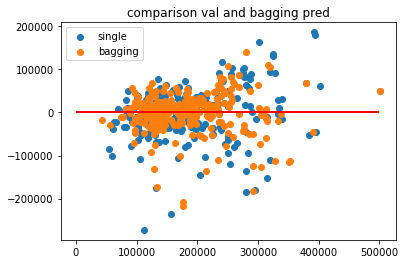

In [478]:
plt.title("comparison val and bagging pred")
plt.scatter(st_pred, st_pred - y_val, label="single")
plt.scatter(bagging_mean, bagging_mean - y_val, label="bagging")
#plt.plot(tmp_dict["SVM"])

# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 500000,lw = 2, color = 'red')

plt.show()

# 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。


スタッキングとは
スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは 
$K_0=3,M_0=2$
 程度にします。


《学習時》


（ステージ0）


学習データを 
* $K_0$個に分割する。
* 分割した内の $(K_0 - 1)$個をまとめて学習用データ、残り 1 個を推定用データとする組み合わせが $K_0$個作れる。
* あるモデルのインスタンスを $K_0$ 個用意し、異なる学習用データを使い学習する。
* それぞれの学習済みモデルに対して、使っていない残り 1 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
* さらに、異なるモデルのインスタンスも $K_0$ 個用意し、同様のことを行う。モデルが $M_0$ 個あれば、 $M_0$ 個のブレンドデータが得られる。

（ステージ n ）


* ステージ $n -1$ のブレンドデータを$M_{n-1}$次元の特徴量を持つ学習用データと考え、 $K_n$ 個に分割する。以下同様である。


（ステージ N ）＊最後のステージ


* ステージ $N -1$ の $M_{N-1}$ 個のブレンドデータを$M_{N - 1}$ 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

《推定時》


（ステージ 0 ）


* テストデータを $K_0 * M_0$ 個の学習済みモデルに入力し、$K_0 * M_0$ 個の推定値を得る。これを $K_0$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）


（ステージ n）


* ステージ $n-1$ で得たブレンドテストを $K_n*M_n$ 個の学習済みモデルに入力し、$K_n*M_n$ 個の推定値を得る。これを $K_n$ の軸で平均値を求め$M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ N ）＊最後のステージ


* ステージ $N-1$ で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [232]:
# データ分割
XX_train, XX_test, yy_train, yy_test = train_test_split( X, y, train_size=0.8, random_state=100)
print(X.shape, XX_train.shape, XX_test.shape)

(1460, 2) (1168, 2) (292, 2)


In [296]:
# 標準化する

sc = StandardScaler()
sc.fit(XX_train)

XX_train_std = sc.transform(XX_train)
XX_test_std = sc.transform(XX_test)

yy_train_log = np.log(yy_train)
yy_test_log = np.log(yy_test)

### 【解答】ノーマル版
弱学習器
* SGDRegressor
* ランダムフォレスト
* SVM

最終モデル
* LinearRegression

データ加工及びパラメータ変更なし

In [416]:
# それぞれのモデル単体の結果をみてみる
# インスタンス作成
#test_model_1 = LGBMRegressor()
#test_model_2 = RandomForestRegressor()
#test_model_3 = DecisionTreeRegressor()

test_model_1 = SGDRegressor(eta0=1e-8)
test_model_2 = RandomForestRegressor()
test_model_3 = SVR()

# fit
test_model_1.fit(XX_train,yy_train)
test_model_2.fit(XX_train,yy_train)
test_model_3.fit(XX_train,yy_train)

# predict
test_pred_1 = test_model_1.predict(XX_test)
test_pred_2 = test_model_2.predict(XX_test)
test_pred_3 = test_model_3.predict(XX_test)


#MSE
rmse_01 = np.sqrt(mean_squared_error(yy_test, test_pred_1))
rmse_02 = np.sqrt(mean_squared_error(yy_test, test_pred_2))
rmse_03 = np.sqrt(mean_squared_error(yy_test, test_pred_3))

print("モデル1のMSE : {:.3f}".format(rmse_01))
print("モデル2のMSE : {:.3f}".format(rmse_02))
print("モデル3のMSE : {:.3f}".format(rmse_03))

モデル1のMSE : 51029.122
モデル2のMSE : 40252.085
モデル3のMSE : 82795.962


In [480]:
# 学習フェーズ
# データ保管用array
OOF = np.zeros((XX_train.shape[0], 3))

# インスタンス保管用辞書
instance = {}

# クロスバリデーションの分割数
n_kf = 4

# Level 1 Model create
# インスタンス作成
first_model_1 = SGDRegressor(eta0=1e-8)
first_model_2 = RandomForestRegressor()
first_model_3 = SVR()


# モデルごとにfitを複数作って、それぞれにcvさせてその結果をブレンドデータとして保存する
kf = KFold(n_splits=n_kf, shuffle=True)

cv_count = 1

for train_index, val_index in kf.split(XX_train):
    #print(XX_train[train_index], val_index)
    instance["model_1_" + str(cv_count)] = first_model_1.fit(XX_train[train_index], yy_train[train_index])
    instance["model_2_" + str(cv_count)] = first_model_2.fit(XX_train[train_index], yy_train[train_index])
    instance["model_3_" + str(cv_count)] = first_model_3.fit(XX_train[train_index], yy_train[train_index])
    
    OOF[val_index, 0] = instance["model_1_" + str(cv_count)].predict(XX_train[val_index])
    OOF[val_index, 1] = instance["model_2_" + str(cv_count)].predict(XX_train[val_index])
    OOF[val_index, 2] = instance["model_3_" + str(cv_count)].predict(XX_train[val_index])
    
    cv_count += 1

print(OOF.shape)





(1168, 3)


In [442]:
# インスタンスをソート
sorted_instance = sorted(instance.items())
sorted_instance

[('model_1_1', SGDRegressor(eta0=1e-08)),
 ('model_1_2', SGDRegressor(eta0=1e-08)),
 ('model_1_3', SGDRegressor(eta0=1e-08)),
 ('model_1_4', SGDRegressor(eta0=1e-08)),
 ('model_2_1', RandomForestRegressor()),
 ('model_2_2', RandomForestRegressor()),
 ('model_2_3', RandomForestRegressor()),
 ('model_2_4', RandomForestRegressor()),
 ('model_3_1', SVR()),
 ('model_3_2', SVR()),
 ('model_3_3', SVR()),
 ('model_3_4', SVR())]

In [443]:
# メタモデル作成

metamodel = LinearRegression()
metamodel.fit(OOF,yy_train)


LinearRegression()

In [444]:
# 推論フェーズ

meta_train = np.zeros((XX_test.shape[0], 3))

model_num = 0
cv_num = 1

for name, model in sorted_instance:
    #print(name, model)
    #print(model_num)
    #print(cv_num)
    pred = model.predict(XX_test)
    meta_train[:,model_num] += pred
    if cv_num % n_kf == 0:
        model_num += 1
    cv_num +=1

#print(meta_train.shape)

last_pred = metamodel.predict(meta_train / n_kf)
print(last_pred.shape)


last_rmse = np.sqrt(mean_squared_error(yy_test, last_pred))

print("メタモデルのMSE : {:.3f}".format(last_rmse))

(292,)
メタモデルのMSE : 39851.551


In [445]:
# まとめ
print("モデル1 : SGDRegressorのMSE : {:.3f}".format(rmse_01))
print("モデル2 : RandomForestのMSE : {:.3f}".format(rmse_02))
print("モデル3 : SVRのMSE : {:.3f}".format(rmse_03))
print("メタモデル : LinearRegressionのMSE : {:.3f}".format(last_rmse))

モデル1 : SGDRegressorのMSE : 51029.122
モデル2 : RandomForestのMSE : 40252.085
モデル3 : SVRのMSE : 82795.962
メタモデル : LinearRegressionのMSE : 39851.551


### 【解答】標準化版
弱学習器
* SGDRegressor
* ランダムフォレスト
* SVM

最終モデル
* LinearRegression

使用データを標準化及び対数化

In [452]:
# 標準化版
# それぞれのモデル単体の結果をみてみる
# インスタンス作成
test_model_1 = SGDRegressor(eta0=1e-3)
test_model_2 = RandomForestRegressor()
test_model_3 = SVR()

# fit
test_model_1.fit(XX_train_std,yy_train_log)
test_model_2.fit(XX_train_std,yy_train_log)
test_model_3.fit(XX_train_std,yy_train_log)

# predict
test_pred_1 = test_model_1.predict(XX_test_std)
test_pred_2 = test_model_2.predict(XX_test_std)
test_pred_3 = test_model_3.predict(XX_test_std)


#MSE
mse_01_std = mean_squared_error(yy_test_log, test_pred_1)
mse_02_std = mean_squared_error(yy_test_log, test_pred_2)
mse_03_std = mean_squared_error(yy_test_log, test_pred_3)

print("標準化モデル1のMSE : {:.3f}".format(mse_01_std))
print("標準化モデル2のMSE : {:.3f}".format(mse_02_std))
print("標準化モデル3のMSE : {:.3f}".format(mse_03_std))

標準化モデル1のMSE : 0.055
標準化モデル2のMSE : 0.047
標準化モデル3のMSE : 0.045


In [453]:
# 学習フェーズ
# データ保管用array
OOF_std = np.zeros((XX_train_std.shape[0], 3))

# インスタンス保管用辞書
instance_std = {}

# Level 1 Model create
# インスタンス作成
first_model_1 = SGDRegressor(eta0=1e-3)
first_model_2 = RandomForestRegressor()
first_model_3 = SVR()

n_kf = 4

# モデルごとにfitを複数作って、それぞれにcvさせてその結果をブレンドデータとして保存する

kf = KFold(n_splits=n_kf, shuffle=True)

cv_count = 1

for train_index, val_index in kf.split(XX_train):
    #print(XX_train[train_index], val_index)
    instance_std["model_1_" + str(cv_count)] = first_model_1.fit(XX_train_std[train_index], yy_train_log[train_index])
    instance_std["model_2_" + str(cv_count)] = first_model_2.fit(XX_train_std[train_index], yy_train_log[train_index])
    instance_std["model_3_" + str(cv_count)] = first_model_3.fit(XX_train_std[train_index], yy_train_log[train_index])
    
    OOF_std[val_index, 0] = instance_std["model_1_" + str(cv_count)].predict(XX_train_std[val_index])
    OOF_std[val_index, 1] = instance_std["model_2_" + str(cv_count)].predict(XX_train_std[val_index])
    OOF_std[val_index, 2] = instance_std["model_3_" + str(cv_count)].predict(XX_train_std[val_index])
    
    cv_count += 1

print(OOF_std.shape)





(1168, 3)


In [454]:
# インスタンスをソート
sorted_instance_std = sorted(instance_std.items())
sorted_instance_std

[('model_1_1', SGDRegressor(eta0=0.001)),
 ('model_1_2', SGDRegressor(eta0=0.001)),
 ('model_1_3', SGDRegressor(eta0=0.001)),
 ('model_1_4', SGDRegressor(eta0=0.001)),
 ('model_2_1', RandomForestRegressor()),
 ('model_2_2', RandomForestRegressor()),
 ('model_2_3', RandomForestRegressor()),
 ('model_2_4', RandomForestRegressor()),
 ('model_3_1', SVR()),
 ('model_3_2', SVR()),
 ('model_3_3', SVR()),
 ('model_3_4', SVR())]

In [455]:
# メタモデル作成

metamodel_std = LinearRegression()
metamodel_std.fit(OOF_std,yy_train_log)


LinearRegression()

In [456]:
# 推論フェーズ

meta_train_std = np.zeros((XX_test_std.shape[0], OOF_std.shape[1]))

model_num = 0
cv_num = 1

for name, model in sorted_instance_std:
    #print(name, model)
    #print(model_num)
    #print(cv_num)
    pred = model.predict(XX_test_std)
    meta_train_std[:,model_num] += pred
    #print(meta_train[0:5])
    if cv_num % n_kf == 0:
        model_num += 1
    cv_num +=1

last_test_std = meta_train_std / n_kf
#print(last_test[0:5])

last_pred_std = metamodel.predict(last_test_std)
#print(last_pred.shape)


last_mse_std = mean_squared_error(yy_test_log, last_pred_std)

print("メタモデルのMSE : {:.3f}".format(last_mse_std))

メタモデルのMSE : 0.044


In [460]:
# まとめ
print("標準化モデル1 : SGDRegressorのMSE : {:.3f}".format(mse_01_std))
print("標準化モデル2 : RandomForestのMSE : {:.3f}".format(mse_02_std))
print("標準化モデル3 : SVRのMSE : {:.3f}".format(mse_03_std))
print("標準化メタモデル : LinearRegressionのMSE : {:.3f}".format(last_mse_std))

標準化モデル1 : SGDRegressorのMSE : 0.055
標準化モデル2 : RandomForestのMSE : 0.047
標準化モデル3 : SVRのMSE : 0.045
標準化メタモデル : LinearRegressionのMSE : 0.044
